# Учеба студента: факторы успеха

_Student Success: Factors & Insights. Uncovering the Pathways to Student Success_

https://www.kaggle.com/datasets/anassarfraz13/student-success-factors-and-insights

## О наборе данных

#### Набор данных содержит информацию о 6607 учащихся и факторах, которые могут повлиять на их академическую успеваемость. Он включает такие переменные, как привычки в учебе, посещаемость, участие родителей, доступ к ресурсам, внеклассные занятия, количество часов сна, мотивация и социально-экономическое положение. Академические результаты измеряются по оценкам предыдущих и итоговых экзаменов.

## Далее под УСПЕХОМ в обучении понимается результат экзаменационного тестирования в баллах (числовой признак 'Exam_Score') более 70, что соответствует значению 'High' в новой колонке с категориальным типом данных 'Score_type'.

## 1. Загружаем необходимые для работы бибилиотеки

In [1]:
# для доступа к датасету напрямую с сайта kaggle

import kagglehub
from glob import glob

# для загрузки данных csv-файла в объект DataFrame

import numpy as np
import pandas as pd


# для визуализации данных

import matplotlib.pyplot as plt 
from matplotlib import colors
import seaborn as sns

# для проверки гипотез о связи категориальных переменных (хи-квадрат)

from scipy.stats import chi2_contingency


## 2. Получаем данные для анализа из внешнего источника (сайт kaggle)

In [2]:
# загружаем последнюю версию выбранного датасета с сайта kaggle
path = kagglehub.dataset_download("anassarfraz13/student-success-factors-and-insights")
print("Path to dataset files:", path)

# пути к файлам датасета сохраняем в списке files
# в данном случае в списке содержится только один путь (один файл)
files = sorted(glob(path + '/*.csv'))
print('Количество файлов в датасете: ', len(files))
files

Path to dataset files: C:\Users\iaasm\.cache\kagglehub\datasets\anassarfraz13\student-success-factors-and-insights\versions\1
Количество файлов в датасете:  1


['C:\\Users\\iaasm\\.cache\\kagglehub\\datasets\\anassarfraz13\\student-success-factors-and-insights\\versions\\1\\StudentPerformanceFactors.csv']

In [3]:
# загружаем в переменную df_students объект DataFrame

df= pd.read_csv(files[0])
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# EDA исследовательский анализ набора данных

## 3. Проводим первичный анализ - Оценка полноты данных: наличие и количество пропусков
## Изучаем перечень признаков, тип данных в каждом столбце

## Ключевые признаки:

    Hours_Studied: Количество часов, которые студент посвящает учебе (int)

    Attendance: Процент посещаемости (int)

    Parental_Involvement: Уровень вовлеченности родителей (categorical)

    Access_to_Resources: Доступность учебных ресурсов (categorical)

    Extracurricular_Activities: Участие во внеклассных мероприятиях (categorical)

    Sleep_Hours: Часы_сна - количество часов сна в день (int)

    Previous_Scores: Предыдущие оценки академической успеваемости (int)

    Motivation_Level: Уровень_мотивации учащегося (categorical)
    
    Tutoring sessions — это занятия с репетитором или индивидуальные уроки (int) 

    Family_Income: Доход семьи: доход отца или семьи (categorical)

    Teacher_Quality: Качество преподавателя (сочетание личных характеристик, знаний и навыков отдельного преподавателя, а также эффективных методов преподавания, которые он использует в классе.) (categorical)

    School_Type: Тип посещаемой школы (categorical)

    Peer_Influence: Влияние сверстников (categorical)

    Physical_Activity: Физические упражнения или активность (categorical)

    Learning_Disabilities: наличие у учащегося трудностей в обучении (например, дислексия, дисграфия, СДВГ, РАС и др.) (categorical)

    Parental_Education_Level: уровень образования родителей (categorical)

    Distance_from_Home: расстояние между домом и школой (categorical)

    Gender: пол учащегося (categorical)

    Exam_Score: итоговая оценка за экзамен (int)

In [4]:
# Получаем сводную информацию 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

#### Оценка полноты данных: Всего в представленном файле 19 колонок и 6607 строк. Из 19 колонок 3 колонки содержат отсутствующие или нулевые значения

## 4. Производим очистку данных и приведение типов

In [5]:
# приводим все колонки с типом данных object к типу данных category 
df=df.astype({'Parental_Involvement': 'category', 
                    'Access_to_Resources': 'category',
                   'Access_to_Resources': 'category',
                   'Extracurricular_Activities': 'category',
                   'Motivation_Level': 'category',
                   'Internet_Access': 'category',
                   'Family_Income': 'category',
                   'Teacher_Quality': 'category',
                   'School_Type': 'category',
                   'Peer_Influence': 'category',
                   'Learning_Disabilities': 'category',
                    'Parental_Education_Level': 'category',
                    'Distance_from_Home': 'category',
                    'Gender': 'category'})

In [6]:
# проверяем типы данных структуры после произведенных изменений
df.dtypes

Hours_Studied                    int64
Attendance                       int64
Parental_Involvement          category
Access_to_Resources           category
Extracurricular_Activities    category
Sleep_Hours                      int64
Previous_Scores                  int64
Motivation_Level              category
Internet_Access               category
Tutoring_Sessions                int64
Family_Income                 category
Teacher_Quality               category
School_Type                   category
Peer_Influence                category
Physical_Activity                int64
Learning_Disabilities         category
Parental_Education_Level      category
Distance_from_Home            category
Gender                        category
Exam_Score                       int64
dtype: object

In [7]:
# вычисляем количество нулевых (отсутствующих) значений в каждой колонке
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Удаляем все строки с отсутствующими значениями

In [8]:
# По умолчанию удаляются все строки, в которых есть хотя бы одно пропущенное значение
df.dropna(inplace=True)

In [9]:
# изучаем сводную информацию после преобразований
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   int64   
 1   Attendance                  6378 non-null   int64   
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   int64   
 6   Previous_Scores             6378 non-null   int64   
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   int64   
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence         

### В результате первого этапа очистки данных у нас в структуре осталось 6378 строк (наблюдений). Тип данных всех нечисловых столбцов приведен к category

### Создаем гистограмму наиважнейшего числового параметра нашей таблицы 'Exam_Score', чтобы посмотреть на распределение значений

<Axes: >

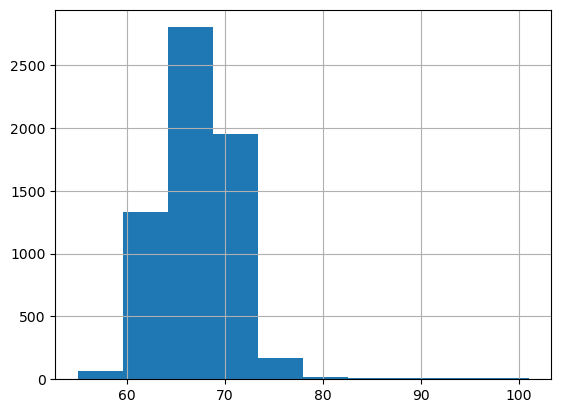

In [10]:
df['Exam_Score'].hist()

In [11]:
df['Exam_Score'].describe()

count    6378.000000
mean       67.252117
std         3.914217
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

In [12]:
df['Exam_Score'].value_counts().sort_index()

Exam_Score
55       1
56       1
57       4
58      21
59      39
60      75
61     166
62     261
63     350
64     478
65     650
66     722
67     692
68     738
69     599
70     526
71     398
72     298
73     133
74     102
75      48
76      16
77       5
78       4
79       3
80       5
82       4
83       1
84       3
85       1
86       4
87       2
88       3
89       3
91       1
92       2
93       2
94       4
95       2
96       1
97       3
98       3
99       2
100      1
101      1
Name: count, dtype: int64

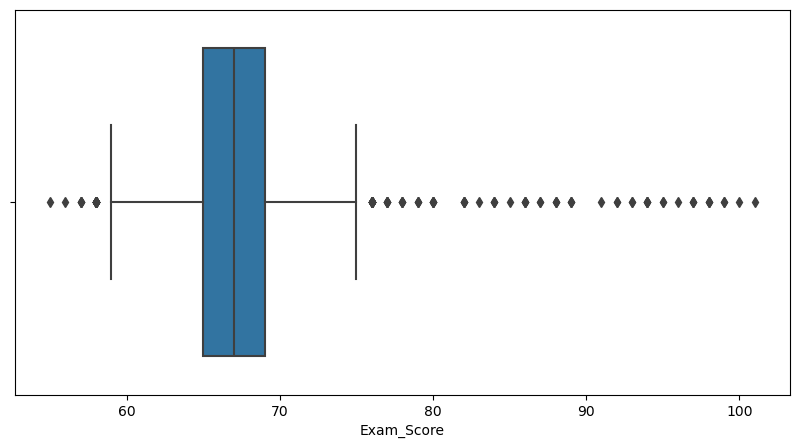

In [13]:
# строим ящик с усами, чтобы посмотреть на выбросы
plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Exam_Score'])

# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Exam_Score_boxplot_outliers.png', dpi=300, bbox_inches='tight')


### Наблюдаем большое количество выбросов. При std 3.9 и среднем значении 67.25 у нас в ряду встречаются значения значительно превышающие верхнюю границу межквартильного размаха. Таких значений не очень много (менее 3 % от изначального количества строк), поэтому решено избавиться от выбросов, отфильтровав объект DataFrame с помощью метода межквартильного размаха (IQR).

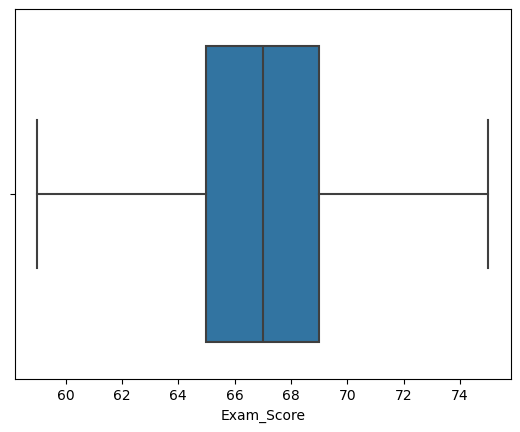

In [14]:
# визуализируем ящик с усами без выбросов
sns.boxplot(x=df['Exam_Score'], showfliers=False)
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Exam_Score_boxplot_no_outliers.png', dpi=300, bbox_inches='tight')

### Для скорейшего исключения выбросов из DataFrame воспользуйтесь методом межквартильного размаха (IQR).

In [15]:
q1 = df['Exam_Score'].quantile(0.25)
q3 = df['Exam_Score'].quantile(0.75)
iqr = q3 - q1
print(q1, q3, iqr, sep='\n')

65.0
69.0
4.0


In [16]:
condition=(df['Exam_Score'] > q1 - 1.5 * iqr) & (df['Exam_Score'] < q3 + 1.5 * iqr)
condition

0       True
1       True
2       True
3       True
4       True
        ... 
6602    True
6603    True
6604    True
6605    True
6606    True
Name: Exam_Score, Length: 6378, dtype: bool

In [17]:
df_students = df.loc[condition]
df_students.reset_index(drop=True, inplace=True)
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6188 non-null   int64   
 1   Attendance                  6188 non-null   int64   
 2   Parental_Involvement        6188 non-null   category
 3   Access_to_Resources         6188 non-null   category
 4   Extracurricular_Activities  6188 non-null   category
 5   Sleep_Hours                 6188 non-null   int64   
 6   Previous_Scores             6188 non-null   int64   
 7   Motivation_Level            6188 non-null   category
 8   Internet_Access             6188 non-null   category
 9   Tutoring_Sessions           6188 non-null   int64   
 10  Family_Income               6188 non-null   category
 11  Teacher_Quality             6188 non-null   category
 12  School_Type                 6188 non-null   category
 13  Peer_Influence    

### В результате 2-го этапа очистки данных у нас осталось 6188 строк.
## Всего в результате двух этапов очистки данных мы удалили 419 строк (6% значений).

## 5. Создаем категориальные признаки на основе числовых столбцов. 

### Создаем новую переменную 'Score_type', чтобы разделить студентов на группы в зависимости от их успеваемости. Всего выделяем 3 категории с результатом до 65 баллов (Low) низкий результат, Средний - Middle (65-70) и Высокий ( High (>70))

In [18]:
cat=[0,64,70,df_students['Exam_Score'].max()]
df_students['Score_type']=pd.cut(df_students['Exam_Score'], cat, labels=['Low (<65)', 'Middle (65-70)', 'High (>70)'])
df_students['Score_type']

C:\Users\iaasm\AppData\Local\Temp\ipykernel_4004\981035400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Score_type']=pd.cut(df_students['Exam_Score'], cat, labels=['Low (<65)', 'Middle (65-70)', 'High (>70)'])


0       Middle (65-70)
1            Low (<65)
2           High (>70)
3           High (>70)
4       Middle (65-70)
             ...      
6183    Middle (65-70)
6184    Middle (65-70)
6185    Middle (65-70)
6186    Middle (65-70)
6187         Low (<65)
Name: Score_type, Length: 6188, dtype: category
Categories (3, object): ['Low (<65)' < 'Middle (65-70)' < 'High (>70)']

In [19]:
df_students['Score_type'].value_counts(normalize=True)

Score_type
Middle (65-70)    0.634615
Low (<65)         0.214932
High (>70)        0.150452
Name: proportion, dtype: float64

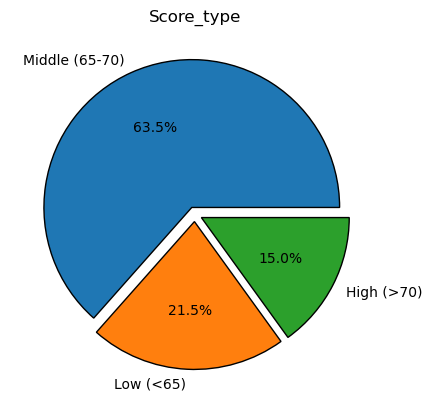

In [20]:
vals = df_students['Score_type'].value_counts(normalize=True).values
labels = (df_students['Score_type'].value_counts(normalize=True)*100).round(2).index
explode = (0.05, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})
# Добавление заголовка
plt.title('Score_type')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Score_type.png', dpi=300, bbox_inches='tight')


# Отображение диаграммы
plt.show()

### В результате исследования данных мы получили следующее распределение учащихся по уровню подготовки к экзамену: 21,5 % имеет результат ниже 65 баллов, Больше половины учащихся (63,5 %) имеют средний результат (от 65 до 70 баллов), оставшаяся часть выборки (15 %) имеет высокий результат (более 70 баллов). То есть можно сделать вывод, что успешными в обучении являются только 15 % учащихся выборки.

# Успешны в обучении только 15 % учащихся. Остальных можно отнести к учащимся со средними показателями либо к отстающим.

### Создаем новую колонку с категориальным типом данных 'Attendance_type', чтобы разделить студентов на группы в зависимости от их посещаемости. Всего выделяем 3 категории

In [21]:
df_students['Attendance'].describe()

count    6188.000000
mean       80.024402
std        11.431423
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64

In [22]:
cat2=[0,69,90,df_students['Attendance'].max()]
df_students['Attendance_type']=pd.cut(df_students['Attendance'], cat2, labels=['Low (<70)', 'Middle (70-90)', 'High (>90)'])
df_students['Attendance_type']

C:\Users\iaasm\AppData\Local\Temp\ipykernel_4004\3498971698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Attendance_type']=pd.cut(df_students['Attendance'], cat2, labels=['Low (<70)', 'Middle (70-90)', 'High (>90)'])


0       Middle (70-90)
1            Low (<70)
2           High (>90)
3       Middle (70-90)
4           High (>90)
             ...      
6183         Low (<70)
6184    Middle (70-90)
6185    Middle (70-90)
6186    Middle (70-90)
6187         Low (<70)
Name: Attendance_type, Length: 6188, dtype: category
Categories (3, object): ['Low (<70)' < 'Middle (70-90)' < 'High (>90)']

In [23]:
df_students['Attendance_type'].value_counts(normalize=True)

Attendance_type
Middle (70-90)    0.528765
High (>90)        0.237072
Low (<70)         0.234163
Name: proportion, dtype: float64

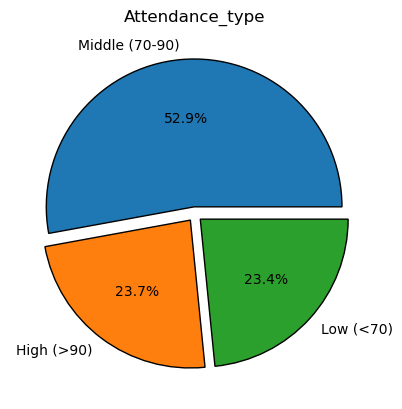

In [24]:
vals = df_students['Attendance_type'].value_counts(normalize=True).values
labels = (df_students['Attendance_type'].value_counts(normalize=True)*100).round(2).index
explode = (0.05, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})
# Добавление заголовка
plt.title('Attendance_type')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Attendance type.png', dpi=300, bbox_inches='tight')


# Отображение диаграммы
plt.show()

## Изучаем данные о сне учеников. Создаем новую колонку с категориальным типом данных 'Sleep_type', чтобы разделить студентов на группы в зависимости от количества часов сна. Всего выделяем 3 категории 

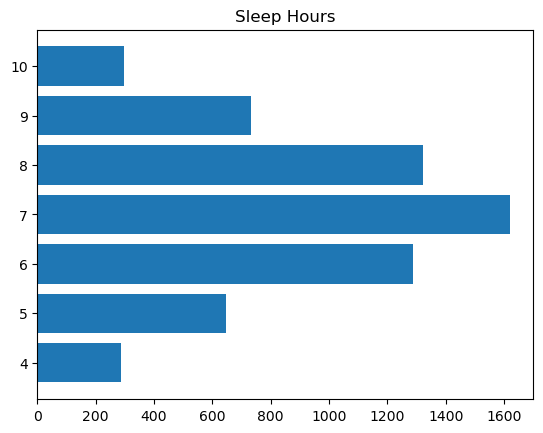

In [25]:
plt.barh((df_students['Sleep_Hours'].value_counts().index),
         (df_students['Sleep_Hours'].value_counts().values)) 
plt.title('Sleep Hours')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Sleep_Hours.png', dpi=300, bbox_inches='tight')


In [26]:
df_students['Sleep_Hours'].value_counts(normalize=True)

Sleep_Hours
7     0.261797
8     0.213478
6     0.208145
9     0.118132
5     0.104396
10    0.047835
4     0.046218
Name: proportion, dtype: float64

In [27]:
cat3=[0,5,7,df_students['Sleep_Hours'].max()]
df_students['Sleep_type']=pd.cut(df_students['Sleep_Hours'], cat3, labels=['Low (<6)', 'Middle (6-7)', 'High (>7)'])
df_students['Sleep_type']

C:\Users\iaasm\AppData\Local\Temp\ipykernel_4004\1312571141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Sleep_type']=pd.cut(df_students['Sleep_Hours'], cat3, labels=['Low (<6)', 'Middle (6-7)', 'High (>7)'])


0       Middle (6-7)
1          High (>7)
2       Middle (6-7)
3          High (>7)
4       Middle (6-7)
            ...     
6183    Middle (6-7)
6184       High (>7)
6185    Middle (6-7)
6186    Middle (6-7)
6187       High (>7)
Name: Sleep_type, Length: 6188, dtype: category
Categories (3, object): ['Low (<6)' < 'Middle (6-7)' < 'High (>7)']

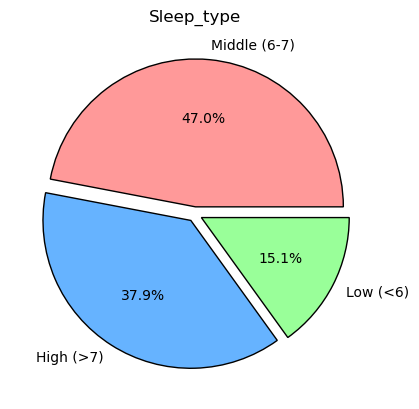

In [28]:
vals = df_students['Sleep_type'].value_counts(normalize=True).values
labels = (df_students['Sleep_type'].value_counts(normalize=True)*100).round(2).index
explode = (0.05, 0.05, 0.05)
fig, ax = plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Sleep_type')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Sleep type.png', dpi=300, bbox_inches='tight')


# Отображение диаграммы
plt.show()

In [29]:
df_students['Sleep_type'].value_counts(normalize=True)

Sleep_type
Middle (6-7)    0.469942
High (>7)       0.379444
Low (<6)        0.150614
Name: proportion, dtype: float64

## 6. Проводим анализ распределения значений выбранных переменных с помощью гистограмм и круговых диаграмм

C:\Users\iaasm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iaasm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iaasm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iaasm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

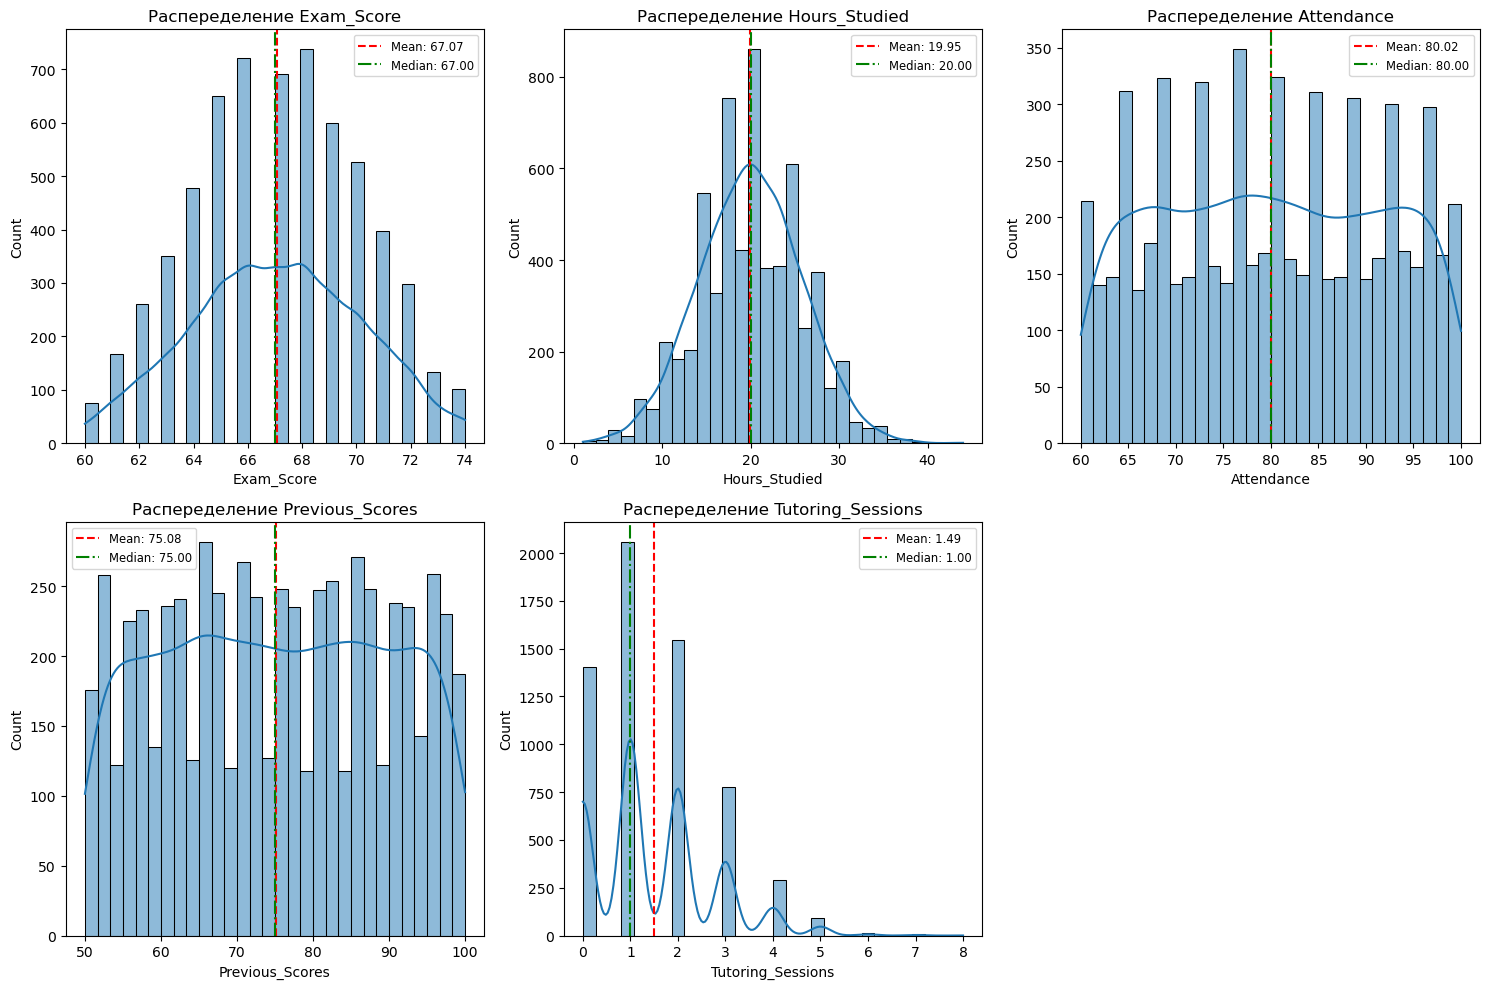

In [30]:
plt.figure(figsize=(15, 10))
numeric_cols = ['Exam_Score', 'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_students[col], kde=True, bins=30)
    plt.title(f'Распеределение {col}')
    plt.axvline(df_students[col].mean(), color='r', linestyle='--', label=f'Mean: {df_students[col].mean():.2f}')
    plt.axvline(df_students[col].median(), color='g', linestyle='-.', label=f'Median: {df_students[col].median():.2f}')
    plt.legend(fontsize='small')
    
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Распределение_числовые_признаки.png', dpi=300, bbox_inches='tight')

plt.tight_layout()

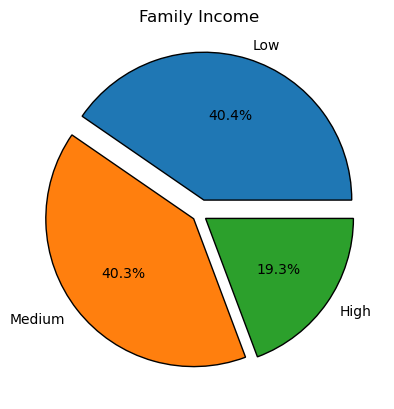

In [31]:
vals = df_students['Family_Income'].value_counts(normalize=True).values
labels = (df_students['Family_Income'].value_counts(normalize=True)*100).round(2).index
explode = (0.10, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Family Income')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Family_Income.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

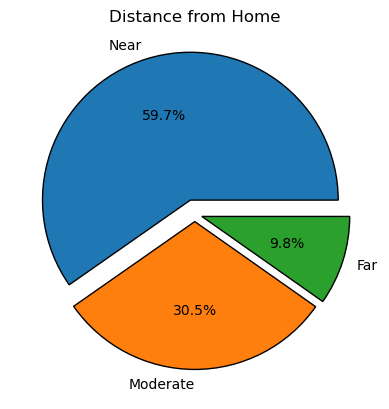

In [32]:
vals = df_students['Distance_from_Home'].value_counts(normalize=True).values
labels = (df_students['Distance_from_Home'].value_counts(normalize=True)*100).round(2).index
explode = (0.10, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Distance from Home')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Distance_from_Home.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

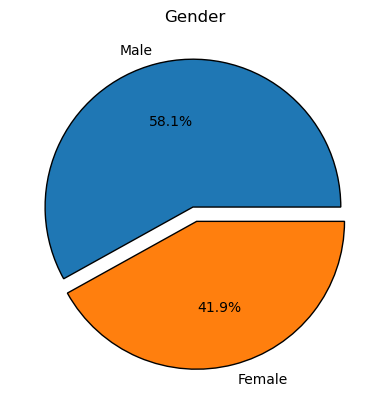

In [33]:
vals = df_students['Gender'].value_counts(normalize=True).values
labels = (df_students['Gender'].value_counts(normalize=True)*100).round(2).index
explode = (0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Gender')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Gender.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

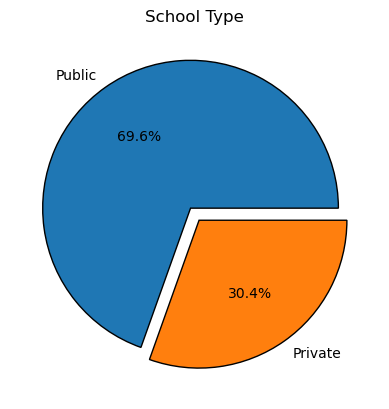

In [34]:
vals = df_students['School_Type'].value_counts(normalize=True).values
labels = (df_students['School_Type'].value_counts(normalize=True)*100).round(2).index
explode = (0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('School Type')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('School_Type.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

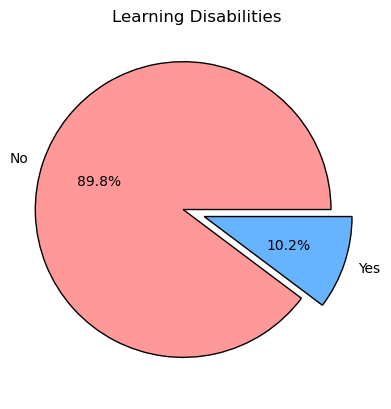

In [35]:
vals = df_students['Learning_Disabilities'].value_counts(normalize=True).values
labels = (df_students['Learning_Disabilities'].value_counts(normalize=True)*100).round(2).index
explode = (0.10, 0.05)
fig, ax = plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Learning Disabilities')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Learning Disabilities.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

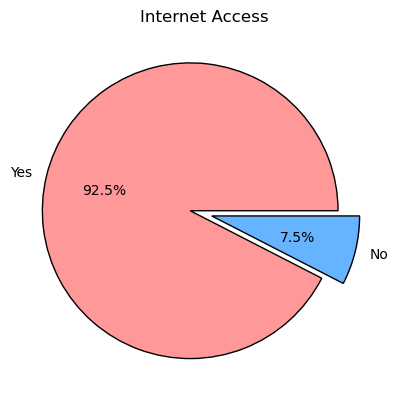

In [36]:
vals = df_students['Internet_Access'].value_counts(normalize=True).values
labels = (df_students['Internet_Access'].value_counts(normalize=True)*100).round(2).index
explode = (0.10, 0.05)
fig, ax = plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Internet Access')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Internet_Access.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

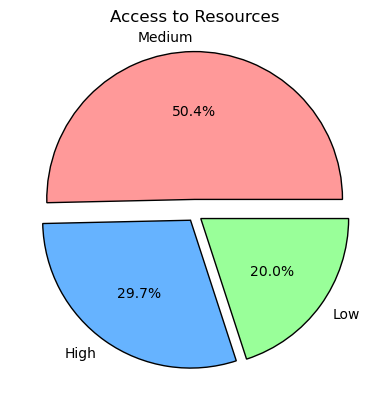

In [37]:
vals = df_students['Access_to_Resources'].value_counts(normalize=True).values
labels = (df_students['Access_to_Resources'].value_counts(normalize=True)*100).round(2).index
explode = (0.10, 0.05, 0.05)
fig, ax = plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})


# Добавление заголовка
plt.title('Access to Resources')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Access_to_Resources.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

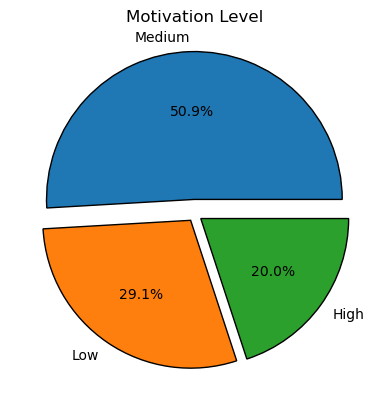

In [38]:
vals = df_students['Motivation_Level'].value_counts(normalize=True).values
labels = (df_students['Motivation_Level'].value_counts(normalize=True)*100).round(2).index
explode = (0.10, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Motivation Level')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Motivation Level.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

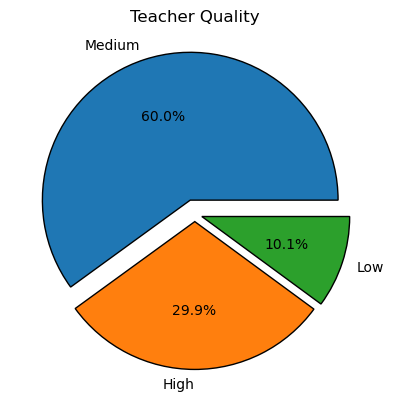

In [39]:
vals = df_students['Teacher_Quality'].value_counts(normalize=True).values
labels = (df_students['Teacher_Quality'].value_counts(normalize=True)*100).round(2).index
explode = (0.10, 0.05, 0.05)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', explode=explode, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

# Добавление заголовка
plt.title('Teacher Quality')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Teacher_Quality.png', dpi=300, bbox_inches='tight')
# Отображение диаграммы
plt.show()

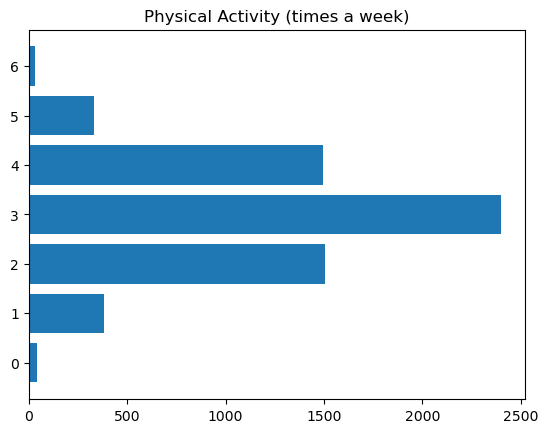

In [40]:
plt.barh((df_students['Physical_Activity'].value_counts().index),
         (df_students['Physical_Activity'].value_counts().values)) 
plt.title('Physical Activity (times a week)')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Physical_Activity.png', dpi=300, bbox_inches='tight')


In [41]:
df_students['Physical_Activity'].value_counts(normalize=True)

Physical_Activity
3    0.387686
2    0.243536
4    0.241758
1    0.061894
5    0.053491
0    0.006787
6    0.004848
Name: proportion, dtype: float64

## 7. Проводим анализ числовых переменных с помощью описательной статистики и корреляционной матрицы

### Выводим показатели средних, минимальных и максимальных значений 

In [42]:
df_students.describe().round(2).T[['mean', 'min', 'max']]

,mean,min,max
Hours_Studied,19.95,1.0,44.0
Attendance,80.02,60.0,100.0
Sleep_Hours,7.04,4.0,10.0
Previous_Scores,75.08,50.0,100.0
Tutoring_Sessions,1.49,0.0,8.0
Physical_Activity,2.98,0.0,6.0
Exam_Score,67.07,60.0,74.0


## Выделяем две наиболее скоррелированные переменные c помощью тепловой карты. 

In [43]:
# Создаем карреляционную матрицу, округлям результ до сотых
df_students_num = df_students.select_dtypes(include=['number']).corr().round(2)
df_students_num

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.00,-0.06,0.01,0.01,-0.03,-0.01,0.48
Attendance,-0.06,1.00,-0.02,-0.04,-0.01,-0.04,0.67
Sleep_Hours,0.01,-0.02,1.00,-0.02,-0.01,-0.00,-0.01
Previous_Scores,0.01,-0.04,-0.02,1.00,-0.02,-0.01,0.19
Tutoring_Sessions,-0.03,-0.01,-0.01,-0.02,1.00,0.01,0.16
Physical_Activity,-0.01,-0.04,-0.00,-0.01,0.01,1.00,0.03
Exam_Score,0.48,0.67,-0.01,0.19,0.16,0.03,1.00


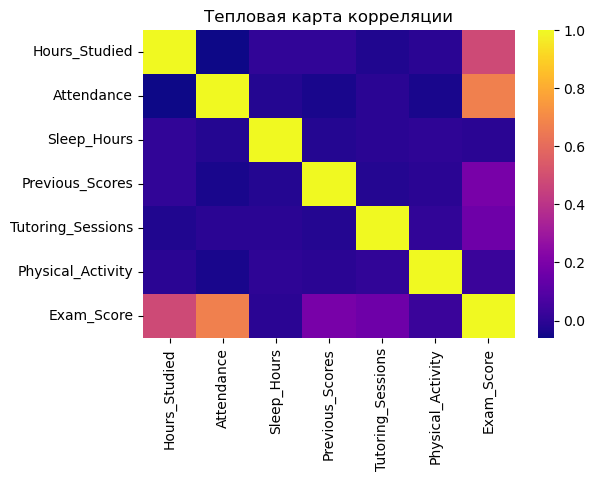

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_students_num, cmap="plasma", fmt=".2f")
plt.title('Тепловая карта корреляции')
# Сохраняем график в файл PNG с разрешением 300 dpi и обрезкой по краям
plt.savefig('Тепловая карта корреляции.png', dpi=300, bbox_inches='tight')
plt.show()

### Нас в первую очередь интересует скоррелированность столбца с результатами итогового экзамена 'Exam_Score'

In [45]:
# выводим пять самых высоких коэффициентов корреляции столбца Exam_Score
# сортируем результат по убыванию
df_students_num['Exam_Score'].nlargest().sort_values(ascending=False)

Exam_Score           1.00
Attendance           0.67
Hours_Studied        0.48
Previous_Scores      0.19
Tutoring_Sessions    0.16
Name: Exam_Score, dtype: float64

### Exam_Score и Attendance - коэффициент корреляции 0.67
### Exam_Score и Hours_Studied  - коэффициент корреляции 0.48
### Также наблюдается небольшая положительная корреляция результатов итогового экзамена (Exam_Score) с предыдущими оценками (Previous_Scores) 0.19 и с количеством дополнительных занятий (Tutoring_Sessions) 0.16

### Строим две дополнительные визуализации взаимосвязи между количественными переменными 'Hours_Studied' и 'Exam_Score' и 'Attendance' и 'Exam_Score' с помощью диаграмм рассеивания, показывая тренд положительной корреляции (на графиках зеленая и красная линии тренда соответственно)

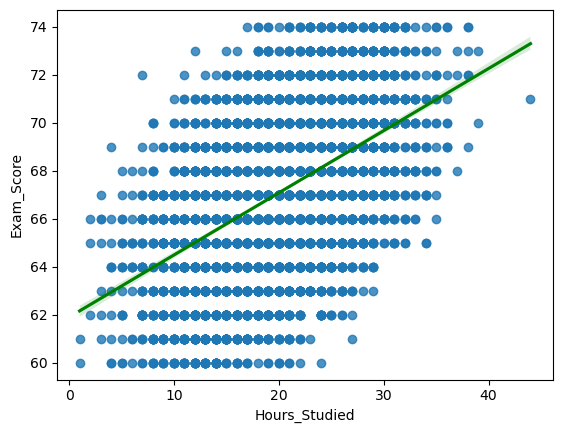

In [46]:
sns.regplot(x=df_students['Hours_Studied'], y= df_students['Exam_Score'], line_kws={'color': 'green'})
plt.savefig('Корреляция_Exam_Score_Hours_Studied.png', dpi=300, bbox_inches='tight')

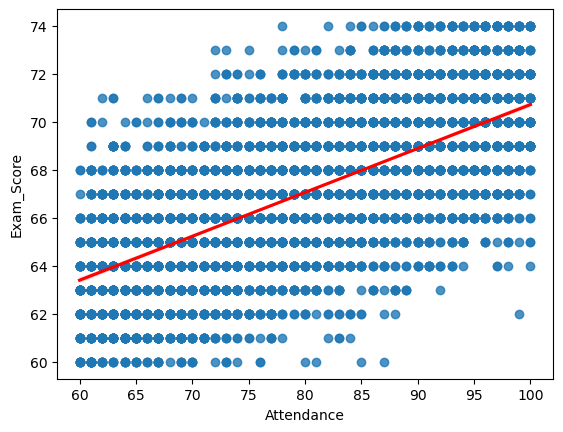

In [47]:
sns.regplot(x=df_students['Attendance'], y= df_students['Exam_Score'], line_kws={'color': 'red'})
plt.savefig('Корреляция_Exam_Score_Attendance.png', dpi=300, bbox_inches='tight')

## Промежуточный вывод : Результат экзамена выше у тех учащихся, у кого наблюдается больший процент посещения занятий и большее общее количество времени, затраченное на обучение

## 8. Проводим анализ категориальных данных с помощью таблиц сопряженности. Проверяем гипотезы с помощью Статистического теста (критерий хи-квадрат Пирсона) 

_Для корреляции категориальных переменных используются таблицы сопряженности и статистические тесты, такие как критерий хи-квадрат .Эти методы позволяют определить, существует ли статистически значимая связь между двумя категориями, а результаты выражаются через p-значение, которое показывает вероятность случайной связи._

### Создаем таблицы сопряженности и формулируем нулевую гипотезу

Нулевая гипотеза о связи двух категориальных переменных заключается в том, что связи между ними нет, то есть эти переменные являются независимыми. 

Статистический тест (критерий хи-квадрат Пирсона) используется для проверки, достаточно ли данных, чтобы отвергнуть эту нулевую гипотезу в пользу альтернативной, предполагающей наличие связи. 

Нулевая гипотеза (H0): Две категориальные переменные независимы. Другими словами, распределение одной переменной не зависит от значений другой. Альтернативная гипотеза (H1): Существует статистически значимая связь между двумя категориальными переменными. 

Если значение p-value меньше выбранного порога (например, 0.05), то нулевая гипотеза отвергается, и делается вывод о наличии связи. Если значение p-value больше порога, то нет оснований отвергать нулевую гипотезу, что означает, что наблюдаемая связь могла возникнуть случайно. 

## (1) Создаем таблицу сопряженности двух признаков - Качества преподавателя и Уровня мотивации учащегося

In [48]:
# Представляем таблицу сопряженности двух категориальных переменных в абсолютных цифрах
pt_1 = pd.crosstab(df_students['Teacher_Quality'], df_students['Motivation_Level'])
# в процентах
pt_1_1 = pd.crosstab(df_students['Teacher_Quality'], df_students['Motivation_Level'], normalize=True).round(2)*100
display(pt_1, pt_1_1)

Motivation_Level,High,Low,Medium
Teacher_Quality,,,
High,383,553,915
Low,125,146,353
Medium,727,1103,1883


Motivation_Level,High,Low,Medium
Teacher_Quality,,,
High,6.0,9.0,15.0
Low,2.0,2.0,6.0
Medium,12.0,18.0,30.0


### Формулируем и проверяем гипотезы (1):

### H0 Качество преподавателя не влияет на уровень мотивации учащегося
### H1 Существует статистически значимая связь между качеством преподавателя и уровнем мотивации учащегося

In [49]:
chi2_contingency(pt_1)
chi2, p, dof, expected = chi2_contingency(pt_1)
print(f"p-значение: {p}")

p-значение: 0.009757881964501962


### ВЫВОД (1) : Мы видим, что полученное p-значение: 0.0097 меньше 0,05, что позволяет нам отклонить нулевую гипотезу, о том, что переменные независимы.

## (2) Создаем таблицу сопряженности двух следующих признаков - Качества преподавателя и Уровня подготовки к экзамену

In [50]:
# Представляем таблицу сопряженности двух категориальных переменных в абсолютных цифрах
pt_2 = pd.crosstab(df_students['Teacher_Quality'], df_students['Score_type'])
# процентное отношение
pt_2_1 = pd.crosstab(df_students['Teacher_Quality'], df_students['Score_type'], normalize=True).round(2)*100
display(pt_2, pt_2_1)

Score_type,Low (<65),Middle (65-70),High (>70)
Teacher_Quality,,,
High,346,1182,323
Low,159,383,82
Medium,825,2362,526


Score_type,Low (<65),Middle (65-70),High (>70)
Teacher_Quality,,,
High,6.0,19.0,5.0
Low,3.0,6.0,1.0
Medium,13.0,38.0,9.0


### Формулируем и проверяем гипотезы (2):

### H0 Качество преподавателя не влияет на уровень подготовки к экзамену
### H1 Существует статистически значимая связь между качеством преподавателя и уровнем подготовки к экзамену

In [51]:
chi2_contingency(pt_2)
chi2, p, dof, expected = chi2_contingency(pt_2)
print(f"p-значение: {p}")

p-значение: 0.00011068313554699906


### ВЫВОД (2): Мы видим, что полученное p-значение: 0.0001 меньше 0,05, что позволяет нам отклонить нулевую гипотезу, о том, что переменные независимы. Мы делаем вывод, что существует статистически значимая связь между качеством преподавателя и уровнем подготовки к экзамену

## (3) Создаем таблицу сопряженности двух признаков - Пол и Уровня подготовки к экзамену

In [52]:
# Представляем таблицу сопряженности двух категориальных переменных в абсолютных цифрах
pt_3 = pd.crosstab(df_students['Gender'], df_students['Score_type'])
# процентное отношение
pt_3_1 = pd.crosstab(df_students['Gender'], df_students['Score_type'], normalize=True).round(2)*100
display(pt_3, pt_3_1)

Score_type,Low (<65),Middle (65-70),High (>70)
Gender,,,
Female,571,1650,374
Male,759,2277,557


Score_type,Low (<65),Middle (65-70),High (>70)
Gender,,,
Female,9.0,27.0,6.0
Male,12.0,37.0,9.0


### Формулируем и проверяем гипотезы (3):

### H0 Пол учащегося не влияет на уровень подготовки к экзамену
### H1 Существует статистически значимая связь междуполом учащегося и уровнем подготовки к экзамену

In [53]:
chi2_contingency(pt_3)
chi2, p, dof, expected = chi2_contingency(pt_3)
print(f"p-значение: {p}")

p-значение: 0.418392433214002


### ВЫВОД (3): В данном случае p-значение (0.4183) больше уровня значимости (0.05), что означает, что у нас нет оснований отвергать гипотезу о независимости. Следовательно, мы можем заключить, что нет статистически значимой зависимости между полом и уровнем подготовки к экзамену.

## (4) Создаем таблицу сопряженности двух признаков - Типа школы и Уровня подготовки к экзамену

In [54]:
# Представляем таблицу сопряженности двух категориальных переменных в абсолютных цифрах
pt_4 = pd.crosstab(df_students['School_Type'], df_students['Score_type'])
# процентное отношение
pt_4_1 = pd.crosstab(df_students['School_Type'], df_students['Score_type'], normalize=True).round(2)*100
display(pt_4, pt_4_1)

Score_type,Low (<65),Middle (65-70),High (>70)
School_Type,,,
Private,388,1187,309
Public,942,2740,622


Score_type,Low (<65),Middle (65-70),High (>70)
School_Type,,,
Private,6.0,19.0,5.0
Public,15.0,44.0,10.0


### Формулируем и проверяем гипотезы (4):

### H0 Тип школы не влияет на уровень подготовки к экзамену
### H1 Существует статистически значимая связь между типом школы и уровнем подготовки к экзамену

In [55]:
chi2_contingency(pt_4)
chi2, p, dof, expected = chi2_contingency(pt_4)
print(f"p-значение: {p}")

p-значение: 0.1098269694098655


### ВЫВОД (4): В данном случае p-значение (0.1098) больше уровня значимости (0.05), что означает, что у нас нет оснований отвергать гипотезу о независимости. Следовательно, мы можем заключить, что нет статистически значимой зависимости между типом школы и уровнем подготовки к экзамену.

## (5) Создаем таблицу сопряженности двух признаков - Семейного дохода и Уровня подготовки к экзамену

In [56]:
# Представляем таблицу сопряженности двух категориальных переменных в абсолютных цифрах
pt_5 = pd.crosstab(df_students['Family_Income'], df_students['Score_type'])
# процентное отношение
pt_5_1 = pd.crosstab(df_students['Family_Income'], df_students['Score_type'], normalize=True).round(2)*100
display(pt_5, pt_5_1)

Score_type,Low (<65),Middle (65-70),High (>70)
Family_Income,,,
High,212,760,222
Low,608,1585,307
Medium,510,1582,402


Score_type,Low (<65),Middle (65-70),High (>70)
Family_Income,,,
High,3.0,12.0,4.0
Low,10.0,26.0,5.0
Medium,8.0,26.0,6.0


### Формулируем и проверяем гипотезы (5):

### H0 Семейный доход не влияет на уровень подготовки к экзамену
### H1 Существует статистически значимая связь между семейным доходом и уровнем подготовки к экзамену

In [57]:
chi2_contingency(pt_5)
chi2, p, dof, expected = chi2_contingency(pt_5)
print(f"p-значение: {p}")

p-значение: 1.06795349183927e-08


### ВЫВОД (5): В данном случае p-значение (1.0679) больше уровня значимости (0.05), что означает, что у нас нет оснований отвергать гипотезу о независимости. Мы можем заключить, что нет статистически значимой зависимости между доходом семьи и уровнем подготовки к экзамену.

## (6) Создаем таблицу сопряженности двух признаков - Удаленность школы от дома и уровень посещаемости занятий

In [58]:
# Представляем таблицу сопряженности двух категориальных переменных в абсолютных цифрах
pt_6 = pd.crosstab(df_students['Attendance_type'], df_students['Distance_from_Home'])
# процентное отношение 
pt_6_1 = pd.crosstab(df_students['Attendance_type'], df_students['Distance_from_Home'], normalize=True).round(2)*100
display(pt_6, pt_6_1)

Distance_from_Home,Far,Moderate,Near
Attendance_type,,,
Low (<70),135,456,858
Middle (70-90),337,996,1939
High (>90),132,437,898


Distance_from_Home,Far,Moderate,Near
Attendance_type,,,
Low (<70),2.0,7.0,14.0
Middle (70-90),5.0,16.0,31.0
High (>90),2.0,7.0,15.0


### Формулируем и проверяем гипотезы (6):

### H0 Удаленность школы от дома не влияет на уровень посещаемости занятий учеником
### H1 Существует статистически значимая связь между удаленностью школы от дома и уровнем посещаемости занятий

In [59]:
chi2_contingency(pt_6)
chi2, p, dof, expected = chi2_contingency(pt_6)
print(f"p-значение: {p}")

p-значение: 0.4690899040334091


### ВЫВОД (6): В данном случае p-значение (0.4690) больше уровня значимости (0.05), что означает, что у нас нет оснований отвергать гипотезу о независимости. Мы можем заключить, что нет статистически значимой зависимости между удаленностью школы от дома и уровнем посещаемости занятий.

## (7) Создаем таблицу сопряженности двух признаков - Удаленность школы от дома и количество часов сна

In [60]:
# Представляем таблицу сопряженности двух категориальных переменных в абсолютных цифрах
pt_7 = pd.crosstab(df_students['Sleep_type'], df_students['Distance_from_Home'])
# процентное отношение 
pt_7_1 = pd.crosstab(df_students['Sleep_type'], df_students['Distance_from_Home'], normalize=True).round(2)*100
display(pt_7, pt_7_1)

Distance_from_Home,Far,Moderate,Near
Sleep_type,,,
Low (<6),88,291,553
Middle (6-7),292,865,1751
High (>7),224,733,1391


Distance_from_Home,Far,Moderate,Near
Sleep_type,,,
Low (<6),1.0,5.0,9.0
Middle (6-7),5.0,14.0,28.0
High (>7),4.0,12.0,22.0


### Формулируем и проверяем гипотезы (7):

### H0 Удаленность школы от дома не влияет на то, сколько часов спит ученик
### H1 Существует статистически значимая связь между удаленностью школы от дома и тем, сколько часов спит ученик

In [61]:
chi2_contingency(pt_7)
chi2, p, dof, expected = chi2_contingency(pt_7)
print(f"p-значение: {p}")

p-значение: 0.7766720315085309


### ВЫВОД (7): В данном случае p-значение (0.77) больше уровня значимости (0.05), что означает, что у нас нет оснований отвергать гипотезу о независимости. Мы можем заключить, что нет статистически значимой зависимости между удаленностью школы от дома и тем, сколько часов спит ученик.

# Общие выводы

### В представленном csv-файле содержатся записи о более чем 6000 учеников частных и государственных учебных учреждений. Более половины из них 58,1% это мальчики. Если принимать за успех в обучении заданное нами пороговое значение в 70 баллов, то успешны в обучении только 15% учащихся. Остальных можно отнести к учащимся со средними показателями (63% имеют результат от 65 до 70 баллов) либо к отстающим (21 % - менее 65 баллов). Посещаемость занятий при этом довольно высокая (в среднем 80%), только 23% учеников можно отнести к категории с низкой посещаемостью (то есть ниже 70%), при чем что фактический минимум по данному признаку 60%. Физическая активность на очень высоком уровне у подавляющего большинства учащихся - 3 раза в неделю и более занимается более 70% респондентов.

### Проблемы в обучении и в доступе к интернету наблюдается не более, чем у 10% учеников по каждому признаку соответственно. В общем проблемы с доступом к ресурсам испытывают 20 % учеников. Регулярно не высыпается (то есть спит менее 6 часов) 15 % учеников, при этом статистически значимой связи между удаленностью от школы и количеством часов сна найдено не было. Также не было найдено корреляции количества часов сна с результатом итогового экзамена.



# Главные выводы

## Можно выделить несколько самых важных факторов, наибольшим образом влияющих на успех в обучении

    •	Посещаемость занятий
    •	Общее количество времени, потраченного на обучение
    •	Качество преподавателя
    
### Статистически значимых связей таких показателей как уровень дохода семьи, пол учащегося и тип школы с результатом итогового экзамена найдено не было. Также не было найдено достаточно оснований, чтобы полагать, что удаленность школы от дома влияет на посещаемость занятий.

### Учащимся рекомендуется уделить особое внимание общему количеству времени на изучение учебных дисциплин, а также проценту посещения занятий, использовать специальные приложения, позволяющие отслеживать соответствующие показатели. 
### Учебным учреждениям рекомендуется провести кадровый анализ преподавательского состава с тем, чтобы выявить наиболее и наименее результативных сотрудников, рассмотреть возможность создания системы поощрения преподавателей, связанную с успешностью их учеников. Направить наименее результативных преподавателей на курсы повышения квалификации и курсы развития soft skills (мягких навыков). В отношении учащихся ввести превентивную систему оповещения, сигнализирующую о снижении посещаемости, возможно с привязкой к прогнозированию успеха в обучении при текущих показателях посещаемости (проведение более детальных опросов учеников и преподавателей и разработка соответствующей ml-модели).

    